## 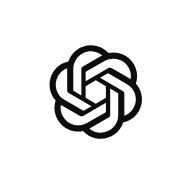  

## Proposition

Retrieve all customers along with their total number of orders, ensuring customers with zero orders are also listed. Filter to include only customers whose total order amount exceeds 50,000.

* * *

## Functional Specification

### Query Name:

`CustomerOrderCountWithTotalFilter`

### Description:

The query combines customers with orders and customers with no orders, and filters out those whose total order amount is less than or equal to 50,000.

### Inputs:

- **Sales.Customer**: Contains customer details.
- **Sales.SalesOrderHeader**: Contains sales order details.

### Outputs:

- **CustomerID**: Unique identifier for the customer.
- **OrderCount**: Number of orders placed by the customer (0 if no orders exist).

### Steps:

1. Perform a `JOIN` between `Sales.Customer` and `Sales.SalesOrderHeader` to count the total orders per customer.
2. Use `UNION` to include customers with no orders by selecting from `Sales.Customer` where `CustomerID` is not in the sales header.
3. Apply the `HAVING` clause to ensure only customers with total purchase amounts exceeding 50,000 are included.

### Assumptions:

- Every customer should be listed, even if they haven't placed an order.
- Only customers whose total order amount exceeds 50,000 are relevant to this query.

### Example Output:

| CustomerID | OrderCount |
| --- | --- |
| 1001 | 5 |
| 1002 | 0 |
| 1003 | 3 |

In [ ]:
use NewAdventureWorks2019;
go
SELECT c.CustomerID, COUNT(soh.SalesOrderID) AS OrderCount
FROM Sales.Customer c
JOIN Sales.SalesOrderHeader soh
    ON c.CustomerID = soh.CustomerID
GROUP BY c.CustomerID

UNION

SELECT CustomerID, 0 AS OrderCount
FROM Sales.Customer
WHERE CustomerID NOT IN (SELECT CustomerID FROM Sales.SalesOrderHeader);

## Proposition
Find all customers who do not have any associated sales orders.

## Functional Specification

### Query Name
`CustomersWithoutSalesOrders`

### Description
This query retrieves the customer IDs and account numbers of all customers who do not have any matching records in the sales orders table.

### Inputs
- **Sales.Customer**: Contains customer details such as `CustomerID` and `AccountNumber`.
- **Sales.SalesOrderHeader**: Contains order-related data linked to customers via `CustomerID`.

### Outputs
- **CustomerID**: Unique identifier for each customer without a sales order.
- **AccountNumber**: Account number associated with the customer.

### Steps
1. Retrieve all `CustomerID` and `AccountNumber` pairs from the **Sales.Customer** table.
2. Retrieve all `CustomerID` and `AccountNumber` pairs from the **Sales.SalesOrderHeader** table.
3. Use the `EXCEPT` operator to return only the customers from the **Sales.Customer** table who do not have matching records in the **SalesOrderHeader** table.

### Assumptions
- Every customer without a sales order should still exist in the **Sales.Customer** table.
- Both tables share the same data types for `CustomerID` and `AccountNumber`.

### Example Output
| CustomerID | AccountNumber |
|------------|---------------|
| 1001       | AW00011001    |
| 1002       | AW00011002    |


In [ ]:
SELECT CustomerID, AccountNumber
FROM Sales.Customer

EXCEPT

SELECT CustomerID, AccountNumber
FROM Sales.SalesOrderHeader;

# Proposition
Retrieve the business entity IDs, first and last names, and modified dates of individuals from the `Person.Person` table who have been modified after January 1, 2015. The results should include only those whose `BusinessEntityID` falls between 100 and 200 or whose last name starts with the letter 'S'.

## Functional Specification

### Query Name
`FilteredPersonRecords`

### Description
This query retrieves records from the `Person.Person` table based on two criteria:
1. The `ModifiedDate` is later than January 1, 2015.
2. Either the `BusinessEntityID` is between 100 and 200 **or** the last name starts with 'S'.

### Inputs
- No input parameters.

### Outputs
- `BusinessEntityID` (INT): Unique identifier for each person.
- `FirstName` (VARCHAR): Person’s first name.
- `LastName` (VARCHAR): Person’s last name.
- `ModifiedDate` (DATE): The date when the record was last modified.

### Steps
1. Query the `Person.Person` table.
2. Filter records where `ModifiedDate` is greater than `'2015-01-01'`.
3. Include only those records where:
   - `BusinessEntityID` is between 100 and 200, **or**
   - `LastName` starts with 'S'.

### Assumptions
- The `Person.Person` table exists in the database.
- The `ModifiedDate` field is formatted as a valid date.
- The filtering conditions (`BETWEEN` and `LIKE`) are applied as expected.

### Example Output
| BusinessEntityID | FirstName | LastName | ModifiedDate |
|------------------|-----------|----------|--------------|
| 150              | John      | Smith    | 2016-03-15   |
| 180              | Sarah     | Sanders  | 2017-07-10   |
| 105              | Mike      | Stone    | 2015-08-25   |


In [ ]:
SELECT BusinessEntityID, FirstName, LastName, ModifiedDate
FROM Person.Person
WHERE ModifiedDate > '2015-01-01'
  AND (BusinessEntityID BETWEEN 100 AND 200 OR LastName LIKE 'S%');

## Proposition
Find the product categories where the average list price of products matches in both:  
1. All products within the category.
2. Products within the category whose list prices are above the overall average product price.

---

## Functional Specification

### Query Name
`Intersected_Category_AvgPrices`

### Description
This query identifies product categories where the average price remains the same under two conditions: (1) all products within the category, and (2) only products with prices above the average list price across all products.

### Inputs
- `Production.Product`: Contains product details, including `ListPrice` and `ProductSubcategoryID`.
- `Production.ProductSubcategory`: Links products to their respective subcategories using `ProductSubcategoryID`.
- `Production.ProductCategory`: Links subcategories to product categories using `ProductCategoryID`.

### Outputs
- `Category`: Name of the product category.
- `AvgPrice`: Average list price of products in the matching categories.

### Steps
1. **Join Tables**: Join `Product`, `ProductSubcategory`, and `ProductCategory` to link products with their categories.
2. **Calculate Average Prices for All Products**: Group by category and calculate the average list price.
3. **Filter by Above-Average Prices**: Use a subquery to filter products with a list price above the overall average.
4. **Intersection**: Use `INTERSECT` to find the categories where the average price is consistent between all products and those with above-average prices.

### Assumptions
- Every product belongs to a subcategory, and every subcategory belongs to a category.
- Product list prices are non-null and valid for calculation.
- There are no duplicate product-category relationships.

### Example Output
| Category        | AvgPrice |
|----------------|----------|
| Clothing       | 45.99    |
| Electronics    | 399.00   |
| Home Supplies  | 25.75    |

In [ ]:
SELECT pc.Name AS Category, AVG(p.ListPrice) AS AvgPrice
FROM Production.Product p
JOIN Production.ProductSubcategory ps
    ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name

INTERSECT

SELECT pc.Name AS Category, AVG(p.ListPrice) AS AvgPrice
FROM Production.Product p
JOIN Production.ProductSubcategory ps
    ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON ps.ProductCategoryID = pc.ProductCategoryID
WHERE p.ListPrice > (SELECT AVG(ListPrice) FROM Production.Product)
GROUP BY pc.Name;

## Proposition

Find all products that exist in the Production.Product table but are not part of any sales order, and also filter those that belong to a product category with an average list price above the overall product average.

---

## Functional Specification

### Query Name:
Find Non-Sold Products with Above-Average Category Prices

### Description:
This query identifies products that are not sold in any sales order and whose category’s average price is higher than the overall average price of all products.

### Inputs:
- **Production.Product**: Contains details about all products.
- **Sales.SalesOrderDetail**: Contains details about products included in sales orders.
- **Production.ProductCategory**: Contains product categories.
- **Production.ProductSubcategory**: Contains product subcategories.

### Outputs:
- **ProductID**: The ID of the product.
- **Name**: The name of the product.

### Steps:
1. **Identify unsold products**: Use `EXCEPT` to find products listed in the `Production.Product` table but not present in any sales order.
2. **Intersect with above-average priced categories**: Use `INTERSECT` to filter products that belong to categories with an average price above the overall product average.
3. **Join relevant tables**: Use joins to retrieve necessary product, category, and subcategory details.
4. **Calculate average price**: Perform a nested query to compute the overall product average, and group by category to get their average prices.

### Assumptions:
- Only products listed in the `Production.Product` table and not in any sales orders are considered.
- Categories with an average price above the global product average are relevant.

### Example Output:
| ProductID | Name            |
|-----------|-----------------|
| 101       | Mountain Bike   |
| 203       | Road Helmet     |
| 305       | Touring Pedals  |

In [ ]:
SELECT p.ProductID, p.Name
FROM Production.Product p

EXCEPT

SELECT sod.ProductID, p.Name
FROM Sales.SalesOrderDetail sod
JOIN Production.Product p ON p.ProductID = sod.ProductID;

## Proposition
Find the number of orders placed each month in 2020 and the total number of orders placed each year.

---

## Functional Specification

### Query Name:
Monthly and Yearly Order Counts

### Description:
This query retrieves:
1. The total number of orders grouped by each month for the year 2020.
2. The total number of orders grouped by each year across all data available.

### Inputs:
- **Table:** `Sales.SalesOrderHeader`
- **Columns:**
  - `OrderDate`

### Outputs:
- **OrderMonth:** Month of the order (for 2020 data).
- **OrderYear:** Year of the order (for all years).
- **OrdersCount:** Number of orders placed.

### Query Steps:
1. **First part (Monthly Orders for 2020):**
   - Select the month from `OrderDate`.
   - Count the number of orders.
   - Filter for orders only in the year 2020.
   - Group results by month.

2. **Second part (Yearly Orders):**
   - Select the year from `OrderDate`.
   - Count the total number of orders.
   - Group results by year.

3. **Union:** 
   - Combine the results of both queries to show monthly order counts for 2020 and yearly order counts for all years.

### Assumptions:
- There are valid records in the `Sales.SalesOrderHeader` table with non-null `OrderDate` values.

### Example Output:
| OrderMonth | OrdersCount |
|------------|-------------|
| 1          | 100         |
| 2          | 150         |

| OrderYear  | OrdersCount |
|------------|-------------|
| 2019       | 1200        |
| 2020       | 1400        |
| 2021       | 1100        |

In [ ]:
SELECT MONTH(OrderDate) AS OrderMonth, COUNT(*) AS OrdersCount
FROM Sales.SalesOrderHeader
WHERE YEAR(OrderDate) = 2020
GROUP BY MONTH(OrderDate)

UNION

SELECT YEAR(OrderDate) AS OrderYear, COUNT(*) AS OrdersCount
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate);

## Proposition

Find all products with a list price above the average and that either have a product ID between 100 and 500 or contain "Bike" in their name.

## Functional Specification

### Query Name:
Products with Above-Average Price and Specific Conditions

### Description:
This query retrieves products from the `Production.Product` table where the list price is higher than the average list price of all products. Additionally, the products must either have a `ProductID` between 100 and 500 or their name must include the word "Bike".

### Inputs:
- **Table:** `Production.Product`
- **Columns:** 
  - `ProductID`: The product's unique identifier.
  - `Name`: The product's name.
  - `ListPrice`: The product's list price.

### Outputs:
- `ProductID`: The product's ID.
- `Name`: The product's name.
- `ListPrice`: The product's list price.

### Steps:
1. **Filter by ListPrice:** Select products where `ListPrice` is greater than the average list price of all products.
2. **Filter by ProductID or Name:** From the filtered products, include only those with:
   - A `ProductID` between 100 and 500.
   - OR a name containing the word "Bike".

### Assumptions:
- The `ListPrice` column contains numeric values.
- Product names are stored in the `Name` column, and the search for "Bike" is case-insensitive.
- Average calculation includes all products in the `Production.Product` table.

### Example Output:
| ProductID | Name              | ListPrice |
|-----------|-------------------|-----------|
| 120       | Mountain Bike     | 800.00    |
| 240       | Road Bike         | 1200.00   |
| 105       | Touring Bike Frame | 400.00   |

In [ ]:
SELECT ProductID, Name, ListPrice
FROM Production.Product
WHERE ListPrice > (SELECT AVG(ListPrice) FROM Production.Product)
  AND (ProductID BETWEEN 100 AND 500 OR Name LIKE '%Bike%');

## Proposition
Find product categories that have more than 10 products and ensure that these categories also appear in a list of all product categories.

---

## Functional Specification

### Query Name
Product Categories with More than 10 Products (Intersection Query)

### Description
This query identifies product categories from the `Production` schema that contain more than 10 products. It ensures that the categories appear in both the complete list of all product categories and the list of categories with more than 10 products using the `INTERSECT` operator.

### Inputs
- **Production.Product**: Table containing product details.
- **Production.ProductSubcategory**: Table mapping products to subcategories.
- **Production.ProductCategory**: Table containing product category names.

### Outputs
- **Category**: Name of the product category.
- **TotalProducts**: Number of products in the category.

### Steps
1. Perform a `JOIN` between `Product`, `ProductSubcategory`, and `ProductCategory` to list all categories with their total products.
2. Group products by category and count the number of products in each category.
3. Use the `INTERSECT` operator to find categories that appear in both:
   - The complete list of product categories with product counts.
   - The list of categories having more than 10 products.

### Assumptions
- Product categories with no products will not appear in the results.
- Each product belongs to a valid subcategory and category.
- Only categories with more than 10 products will be displayed in the final result.

### Example Output
| Category        | TotalProducts |
|----------------|---------------|
| Bikes          | 15            |
| Accessories    | 12            |


In [ ]:
SELECT pc.Name AS Category, COUNT(p.ProductID) AS TotalProducts
FROM Production.Product p
JOIN Production.ProductSubcategory ps
    ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name

INTERSECT

SELECT pc.Name AS Category, COUNT(p.ProductID) AS TotalProducts
FROM Production.Product p
JOIN Production.ProductSubcategory ps
    ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name
HAVING COUNT(p.ProductID) > 10;

# Proposition

Find the product categories where the total number of products exceeds 10, intersected with all product categories and their product counts.

## Functional Specification

### Query Name
`ProductCategoriesWithMoreThanTenProducts`

### Description
This query returns a list of product categories along with their total product counts. It filters the categories to include only those with more than 10 products by using the `INTERSECT` clause to compare with the list of all product categories.

### Inputs
- **Production.Product**: Contains product details.
- **Production.ProductSubcategory**: Contains product subcategory details.
- **Production.ProductCategory**: Contains product category details.

### Outputs
- **Category**: Name of the product category.
- **TotalProducts**: Total number of products in the category.

### Steps
1. Join `Production.Product` with `Production.ProductSubcategory` on `ProductSubcategoryID`.
2. Join `Production.ProductSubcategory` with `Production.ProductCategory` on `ProductCategoryID`.
3. Group by product category name to count the total products.
4. Use `INTERSECT` to find categories appearing in both the complete list and the list of categories having more than 10 products.

### Assumptions
- All products belong to valid subcategories and categories.
- The dataset may contain categories with zero products, but they are not included unless they meet the conditions of the intersection.

### Example Output
| Category        | TotalProducts |
|-----------------|---------------|
| Bikes           | 15            |
| Accessories     | 12            |

In [ ]:
SELECT v.BusinessEntityID, v.Name, SUM(pod.LineTotal) AS TotalOrderValue
FROM Purchasing.Vendor v
JOIN Purchasing.PurchaseOrderHeader poh
    ON v.BusinessEntityID = poh.VendorID
JOIN Purchasing.PurchaseOrderDetail pod
    ON poh.PurchaseOrderID = pod.PurchaseOrderID
GROUP BY v.BusinessEntityID, v.Name
HAVING SUM(pod.LineTotal) > 50000
    AND (v.BusinessEntityID < 500 OR v.Name LIKE '%Supply%');

## Proposition
Find all customers who have purchased the 'Mountain Bike' product.

## Functional Specification

### Query Name
`Customers_Who_Purchased_Mountain_Bike`

### Description
This query identifies distinct customers who have bought the 'Mountain Bike' product from the company's sales records.

### Inputs
- None (Static product name: 'Mountain Bike')

### Outputs
- **CustomerID**: Unique identifier of the customer.
- **ProductName**: Name of the purchased product (specifically 'Mountain Bike').

### Steps
1. **Join `Sales.Customer` and `Sales.SalesOrderHeader`**: Match each customer's orders based on `CustomerID`.
2. **Join `Sales.SalesOrderHeader` and `Sales.SalesOrderDetail`**: Get order details linked to the orders by `SalesOrderID`.
3. **Join `Sales.SalesOrderDetail` with `Production.Product`**: Match the ordered products based on `ProductID`.
4. **Filter by Product Name**: Retrieve only records where the product name is 'Mountain Bike'.
5. **Select Distinct Customers**: Ensure no duplicate customer records are returned.

### Assumptions
- Each product has a unique name.
- A customer may purchase the same product multiple times, but each customer should appear only once in the result.

### Example Output
| CustomerID | ProductName   |
|------------|---------------|
| 12345      | Mountain Bike |
| 67890      | Mountain Bike |



In [11]:
SELECT DISTINCT c.CustomerID, p.Name AS ProductName
FROM Sales.Customer c
JOIN Sales.SalesOrderHeader soh
    ON c.CustomerID = soh.CustomerID
JOIN Sales.SalesOrderDetail sod
    ON soh.SalesOrderID = sod.SalesOrderID
JOIN Production.Product p
    ON sod.ProductID = p.ProductID
WHERE p.Name = 'Mountain Bike';

(0 rows affected)

Total execution time: 00:00:00.031

CustomerID,ProductName
